<a href="https://colab.research.google.com/github/SreyasiNath/Handwritten-assamese-character-recognition/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/newdtaset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [69]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras
from keras import utils
from keras import layers
from keras import utils as np_utils
#from utils import to_categorical
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('//content/drive/MyDrive/newdtaset'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:25]

['//content/drive/MyDrive/newdtaset/bdo/111.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/115.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/108.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/110.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/112.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/113.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/11.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/109.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/114.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/107.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/103.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/100.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/1.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/101.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/104.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/102.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/105.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/106.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/10.jpg',
 '//content/drive/MyDrive/newdtaset/bdo/125.jpg',
 '//

In [70]:
train=pd.DataFrame()
train=train.assign(filename=Id)

In [71]:
root_path='/content/drive/MyDrive/newdtaset'
dd=os.listdir(root_path)
dd

['bdo', 'glo', 'klo', 'ndro', 'niojnjo', 'nisnso', 'pro', 'shro', 'sto', 'tno']

In [72]:
from pathlib import Path
from sklearn import preprocessing

dir_path = r'/content/drive/MyDrive/newdtaset'
image_link=[]
for path in os.listdir(dir_path):
   image_link.append(path)
image_link = list(Path(r'/content/drive/MyDrive/newdtaset').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

In [73]:
import numpy as np
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = str)
df['name'] = image_name
df['label'] = image_label

In [74]:
df

,link,name,label
0,/content/drive/MyDrive/newdtaset/bdo/111.jpg,bdo,0
1,/content/drive/MyDrive/newdtaset/bdo/115.jpg,bdo,0
2,/content/drive/MyDrive/newdtaset/bdo/108.jpg,bdo,0
3,/content/drive/MyDrive/newdtaset/bdo/110.jpg,bdo,0
4,/content/drive/MyDrive/newdtaset/bdo/112.jpg,bdo,0
...,...,...,...
2350,/content/drive/MyDrive/newdtaset/tno/84.jpg,tno,9
2351,/content/drive/MyDrive/newdtaset/tno/79.jpg,tno,9
2352,/content/drive/MyDrive/newdtaset/tno/78.jpg,tno,9
2353,/content/drive/MyDrive/newdtaset/tno/98.jpg,tno,9


<Axes: >

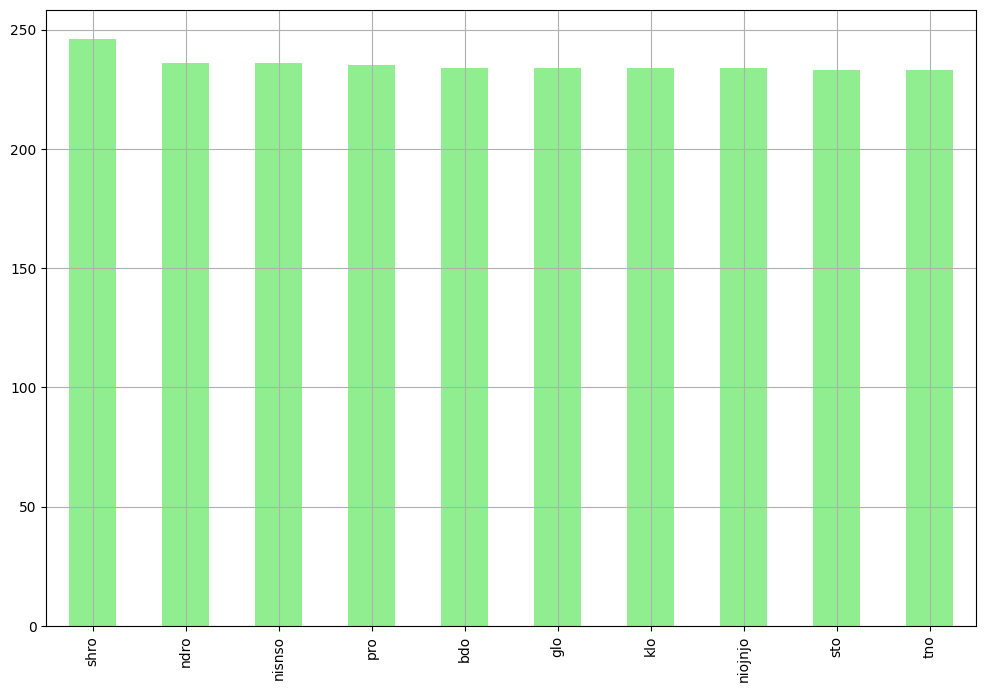

In [75]:
df.name.value_counts().plot(kind = 'bar', figsize = (12, 8), grid = True, color = 'lightgreen')

In [76]:
df.shape

(2355, 3)

In [77]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_gen=ImageDataGenerator(rescale=1./255)

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.1
)

train_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/newdtaset",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

valid_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/newdtaset",
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

test_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/newdtaset",
    target_size=(256, 256),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

# train_data=train_gen.flow_from_directory("/content/drive/MyDrive/newdataset",target_size=(256,256),batch_size=32,class_mode='categorical',shuffle=True, subset='training')

# valid_data=train_gen.flow_from_directory("/content/drive/MyDrive/newdataset", target_size=(256,256),batch_size=32,shuffle=True,subset='validation')

# test_data=train_gen.flow_from_directory("/content/drive/MyDrive/newdataset",target_size=(256,256),batch_size=32,shuffle=True,subset='validation')

Found 2124 images belonging to 10 classes.
Found 231 images belonging to 10 classes.
Found 231 images belonging to 10 classes.


In [78]:
# model=Sequential()

# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPool2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(512,activation='relu'))

# model.add(layers.Dense(10,activation='sigmoid'))

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='sigmoid'))



In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 128)     

In [80]:

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [81]:
History= model.fit_generator(
          steps_per_epoch=30,
          generator=train_data,
          validation_data=valid_data,
          epochs=75,shuffle=True)

<ipython-input-81-a1c04aabadaf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History= model.fit_generator(


Epoch 1/75
30/30 [==============================] - 396s 13s/step - loss: 2.3056 - accuracy: 0.0915 - val_loss: 2.2942 - val_accuracy: 0.0952
Epoch 2/75
30/30 [==============================] - 183s 6s/step - loss: 2.2348 - accuracy: 0.1104 - val_loss: 2.0715 - val_accuracy: 0.2035
Epoch 3/75
30/30 [==============================] - 102s 3s/step - loss: 2.0526 - accuracy: 0.1830 - val_loss: 2.0042 - val_accuracy: 0.1991
Epoch 4/75
30/30 [==============================] - 61s 2s/step - loss: 2.0231 - accuracy: 0.1872 - val_loss: 1.9898 - val_accuracy: 0.1991
Epoch 5/75
30/30 [==============================] - 45s 2s/step - loss: 2.0179 - accuracy: 0.1917 - val_loss: 1.9987 - val_accuracy: 0.1991
Epoch 6/75
30/30 [==============================] - 32s 1s/step - loss: 2.0132 - accuracy: 0.2000 - val_loss: 1.9980 - val_accuracy: 0.1991
Epoch 7/75
30/30 [==============================] - 29s 954ms/step - loss: 2.0031 - accuracy: 0.1979 - val_loss: 1.9814 - val_accuracy: 0.1991
Epoch 8/75
30

In [82]:
#evaluate model
score=model.evaluate(test_data,verbose=0)
print("test loss",score[0])
print("test accuracy",score[1])

test loss 0.15955568850040436
test accuracy 0.9523809552192688


In [83]:
import matplotlib.pyplot as plt

def plot_loss(History):
    # Plot training and validation loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(History):
    # Plot training and validation accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()



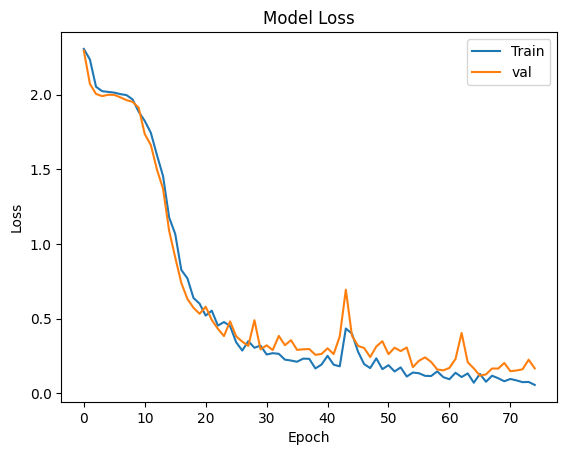

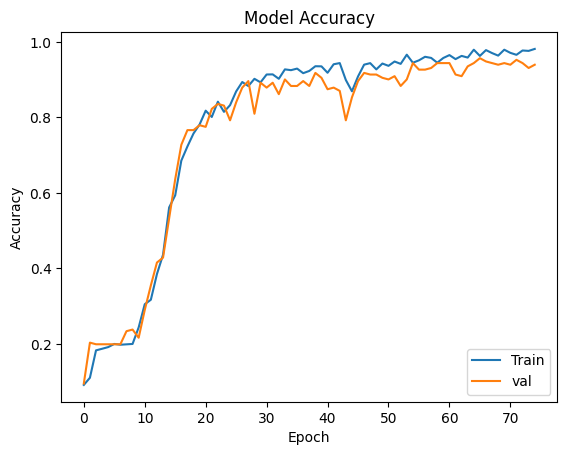

In [84]:
import matplotlib.pyplot as plt
plot_loss(History)
plot_accuracy(History)

In [85]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.1)

test_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/newdtaset',
    target_size=(256, 256),
    batch_size= 64,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 231 images belonging to 10 classes.


In [86]:
# Get the true labels for the test data
true_labels = test_data.classes

In [87]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [88]:
predicted_labels = model.predict(test_data)

4/4 [==============================] - 5s 803ms/step


In [89]:
predicted_labels = np.argmax(predicted_labels, axis=1)

In [90]:
predicted_labels

array([1, 8, 9, 8, 9, 5, 7, 6, 8, 5, 7, 9, 9, 2, 7, 3, 4, 7, 3, 3, 9, 8,
       1, 8, 6, 8, 5, 0, 9, 6, 2, 7, 1, 2, 8, 3, 7, 2, 8, 4, 9, 7, 8, 2,
       5, 1, 0, 7, 1, 8, 7, 6, 8, 0, 4, 7, 8, 0, 7, 6, 1, 8, 6, 2, 5, 4,
       9, 8, 2, 6, 1, 3, 4, 3, 4, 3, 0, 6, 1, 2, 3, 7, 8, 8, 7, 5, 5, 7,
       2, 5, 2, 9, 1, 8, 4, 1, 0, 9, 2, 6, 6, 3, 0, 4, 2, 6, 9, 8, 4, 0,
       0, 6, 3, 9, 3, 1, 8, 7, 0, 8, 6, 0, 1, 3, 8, 7, 6, 9, 0, 9, 4, 7,
       8, 2, 6, 9, 6, 2, 4, 2, 5, 7, 2, 6, 8, 7, 7, 2, 0, 1, 1, 7, 5, 4,
       0, 0, 5, 8, 1, 8, 5, 4, 0, 3, 5, 5, 9, 9, 0, 5, 9, 2, 3, 8, 3, 7,
       3, 1, 6, 2, 8, 2, 6, 6, 5, 5, 9, 7, 0, 6, 8, 8, 0, 3, 5, 1, 3, 4,
       4, 2, 8, 3, 5, 6, 9, 8, 1, 3, 6, 3, 9, 7, 1, 8, 2, 4, 5, 0, 1, 0,
       3, 5, 5, 6, 1, 8, 0, 5, 4, 0, 6])

In [91]:
import matplotlib.pyplot as plt

In [92]:
# Get a few images from the test set
num_images = 10
test_images, test_labels = next(test_data)



In [93]:
from sklearn.metrics import accuracy_score

# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

#Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
# # Calculate the accuracy
# accuracy =accuracy_score(true_labels, predicted_labels)
# print("Predicted accuracy: {:.2f}%".format(accuracy * 100))


4/4 [==============================] - 3s 801ms/step - loss: 0.1852 - accuracy: 0.9264
Test Loss: 0.18518829345703125
Test Accuracy: 0.9264069199562073


In [94]:
# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]



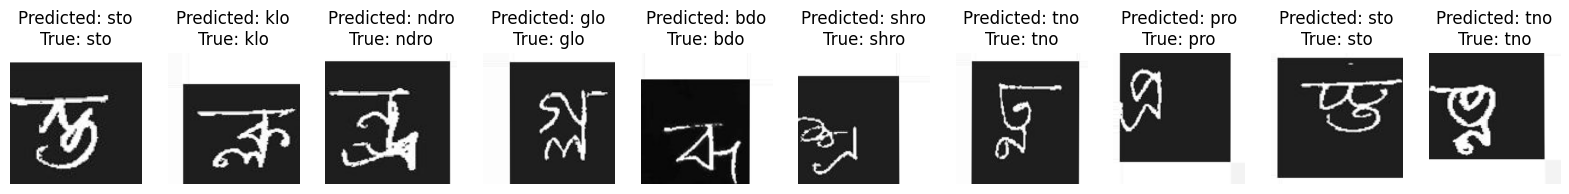

In [95]:
# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [96]:
# from sklearn.metrics import classification_report, confusion_matrix
# # Generate the classification report
# print(classification_report(true_labels, predicted_labels))

from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:num_samples]
predicted_labels = predicted_labels[:num_samples]

# Generate the classification report
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      0.88      0.88         8
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       0.89      1.00      0.94         8
           6       0.78      0.88      0.82         8
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6

    accuracy                           0.94        64
   macro avg       0.95      0.94      0.95        64
weighted avg       0.94      0.94      0.94        64



In [97]:

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[7 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 1 0 0 0]
 [0 0 5 0 0 1 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 8 0 0 0 0]
 [0 1 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 1 5 0 0]
 [0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 6]]
